In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from ast import literal_eval

from scipy.stats import bootstrap
import numpy as np

In [2]:
selected_topics_df = pd.read_csv(
    '../out_files/selected_topics_shift_per_period_compass_50iterations.csv',
    converters={'period_pair': literal_eval})
selected_topics_df

,iteration,period_pair,word,semantic_similarity,common_voc_size,neighbors_t1,neighbors_t2
0,0,"(12, 13)",συλλογικη,0.858836,80563,"[('κλαδικη', 0.7225825786590576), ('ατομικη', ...","[('κλαδικη', 0.6316236257553101), ('ατομικη', ..."
1,0,"(11, 12)",φορολογικα,0.882089,80924,"[('προσθετα', 0.6532301902770996), ('τελωνειακ...","[('προσθετα', 0.6811063289642334), ('βαρη', 0...."
2,0,"(10, 11)",εθνικη,0.956287,86396,"[('παλλαικη', 0.4205504059791565), ('ελληνικη'...","[('πολυμελης', 0.5375679135322571), ('παλλαικη..."
3,0,"(8, 9)",αμυνα,0.882250,63542,"[('ασφαλεια', 0.6846429109573364), ('ακεραιοτη...","[('ακεραιοτητα', 0.6850458979606628), ('ασφαλε..."
4,0,"(11, 12)",συλλογικη,0.882529,80924,"[('ατομικη', 0.5900278091430664), ('κλαδικη', ...","[('κλαδικη', 0.6964172124862671), ('αποικιοκρα..."
...,...,...,...,...,...,...,...
48245,49,"(13, 15)",ανωτατη,0.873688,83188,"[('τριτοβαθμια', 0.7540215253829956), ('διαπολ...","[('τριτοβαθμια', 0.7569918632507324), ('μειονο..."
48246,49,"(12, 13)",αμυνα,0.873383,80563,"[('ομοψυχια', 0.5617215633392334), ('πινακοθηκ...","[('ομοψυχια', 0.5596197843551636), ('ακεραιοτη..."
48247,49,"(7, 8)",τουριστικης,0.873335,68800,"[('βιομηχανικης', 0.6592989563941956), ('οικισ...","[('ολοκληρωμενης', 0.7599883675575256), ('οικι..."
48248,49,"(7, 8)",επιδοματων,0.877304,68800,"[('επιδοματος', 0.8182019591331482), ('βοηθημα...","[('επιδοματος', 0.766563892364502), ('αποδοχων..."


In [3]:
def confidence_intervals(data):
    res = bootstrap((data,), np.mean, confidence_level=0.95)
    return (res.confidence_interval.low, res.confidence_interval.high)

In [4]:
selected_topics_df = selected_topics_df[['period_pair', 'word', 'semantic_similarity']].\
    groupby(['period_pair', 'word']).agg(['mean', confidence_intervals]).reset_index()
selected_topics_df.sort_values(by='period_pair', inplace=True)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                               
                         confidence_intervals  
0    (0.8728044112301528, 0.8760501799912643)  
75   (0.8211408742303207, 0.8272489789877857)  
74   (0.8195847767670158, 0.8251972821410256)  
73   (0.8863125969718394, 0.8892914565258672)  
72   (0.8197615943798643, 0.8251958389425835)  
..                                        ...  
884  (0.7623293910493161, 0.7686420004910473)  
883   (0.862542988207869, 0.8661962666569734)  
882  (0.9011583288547457, 0.9043426734733815)  
908  (0.6416085397644913, 0.6610462350253086)  
964   (0.8465510572810256, 0.850628741637062)  

[965 rows x 4 columns]

In [5]:
selected_topics_df.columns.to_flat_index() 

Index([                            ('period_pair', ''),
                                          ('word', ''),
                       ('semantic_similarity', 'mean'),
       ('semantic_similarity', 'confidence_intervals')],
      dtype='object')

In [6]:
selected_topics_df.columns = [
    '_'.join(filter(None, x))
    for x in selected_topics_df.columns.to_flat_index() 
]
selected_topics_df

,period_pair,word,semantic_similarity_mean,semantic_similarity_confidence_intervals
0,"(7, 8)",αγροτες,0.874325,"(0.8728044112301528, 0.8760501799912643)"
75,"(7, 8)",πολιτισμος,0.824209,"(0.8211408742303207, 0.8272489789877857)"
74,"(7, 8)",πολιτισμο,0.822350,"(0.8195847767670158, 0.8251972821410256)"
73,"(7, 8)",περιβαλλον,0.887809,"(0.8863125969718394, 0.8892914565258672)"
72,"(7, 8)",πανεπιστημιακο,0.822376,"(0.8197615943798643, 0.8251958389425835)"
...,...,...,...,...
884,"(17, 18)",γυναικας,0.765501,"(0.7623293910493161, 0.7686420004910473)"
883,"(17, 18)",γυναικα,0.864372,"(0.862542988207869, 0.8661962666569734)"
882,"(17, 18)",βασικος,0.902739,"(0.9011583288547457, 0.9043426734733815)"
908,"(17, 18)",ημιαπασχοληση,0.652212,"(0.6416085397644913, 0.6610462350253086)"


In [7]:
selected_topics_df[['ci_low', 'ci_high']] = pd.DataFrame(
    selected_topics_df['semantic_similarity_confidence_intervals'].tolist(), 
    index= selected_topics_df.index)
selected_topics_df

,period_pair,word,semantic_similarity_mean,semantic_similarity_confidence_intervals,ci_low,ci_high
0,"(7, 8)",αγροτες,0.874325,"(0.8728044112301528, 0.8760501799912643)",0.872804,0.876050
75,"(7, 8)",πολιτισμος,0.824209,"(0.8211408742303207, 0.8272489789877857)",0.821141,0.827249
74,"(7, 8)",πολιτισμο,0.822350,"(0.8195847767670158, 0.8251972821410256)",0.819585,0.825197
73,"(7, 8)",περιβαλλον,0.887809,"(0.8863125969718394, 0.8892914565258672)",0.886313,0.889291
72,"(7, 8)",πανεπιστημιακο,0.822376,"(0.8197615943798643, 0.8251958389425835)",0.819762,0.825196
...,...,...,...,...,...,...
884,"(17, 18)",γυναικας,0.765501,"(0.7623293910493161, 0.7686420004910473)",0.762329,0.768642
883,"(17, 18)",γυναικα,0.864372,"(0.862542988207869, 0.8661962666569734)",0.862543,0.866196
882,"(17, 18)",βασικος,0.902739,"(0.9011583288547457, 0.9043426734733815)",0.901158,0.904343
908,"(17, 18)",ημιαπασχοληση,0.652212,"(0.6416085397644913, 0.6610462350253086)",0.641609,0.661046


In [8]:
selected_topics_df['yerr_low'] = (selected_topics_df['semantic_similarity_mean'] 
                                  - selected_topics_df['ci_low'])
selected_topics_df['yerr_high'] = (selected_topics_df['ci_high'] 
                                   - selected_topics_df['semantic_similarity_mean'])
selected_topics_df

,period_pair,word,semantic_similarity_mean,semantic_similarity_confidence_intervals,ci_low,ci_high,yerr_low,yerr_high
0,"(7, 8)",αγροτες,0.874325,"(0.8728044112301528, 0.8760501799912643)",0.872804,0.876050,0.001521,0.001725
75,"(7, 8)",πολιτισμος,0.824209,"(0.8211408742303207, 0.8272489789877857)",0.821141,0.827249,0.003068,0.003040
74,"(7, 8)",πολιτισμο,0.822350,"(0.8195847767670158, 0.8251972821410256)",0.819585,0.825197,0.002765,0.002848
73,"(7, 8)",περιβαλλον,0.887809,"(0.8863125969718394, 0.8892914565258672)",0.886313,0.889291,0.001497,0.001482
72,"(7, 8)",πανεπιστημιακο,0.822376,"(0.8197615943798643, 0.8251958389425835)",0.819762,0.825196,0.002614,0.002820
...,...,...,...,...,...,...,...,...
884,"(17, 18)",γυναικας,0.765501,"(0.7623293910493161, 0.7686420004910473)",0.762329,0.768642,0.003172,0.003141
883,"(17, 18)",γυναικα,0.864372,"(0.862542988207869, 0.8661962666569734)",0.862543,0.866196,0.001829,0.001824
882,"(17, 18)",βασικος,0.902739,"(0.9011583288547457, 0.9043426734733815)",0.901158,0.904343,0.001581,0.001604
908,"(17, 18)",ημιαπασχοληση,0.652212,"(0.6416085397644913, 0.6610462350253086)",0.641609,0.661046,0.010604,0.008834


In [9]:
periods = {
    7: (1989, 1993),
    8: (1993, 1996),
    9: (1996, 2000),
    10: (2000, 2004),
    11: (2004, 2007),
    12: (2007, 2009),
    13: (2009, 2012),
    14: (2012, 2012),
    15: (2012, 2014),
    16: (2015, 2015),
    17: (2015, 2019),
    18: (2019, 2020)
}

In [10]:
selected_topics_df['period_start'] = selected_topics_df['period_pair'].map(lambda x: periods[x[0]][0])
selected_topics_df['period_end'] = selected_topics_df['period_pair'].map(lambda x: periods[x[1]][1])
selected_topics_df

,period_pair,word,semantic_similarity_mean,semantic_similarity_confidence_intervals,ci_low,ci_high,yerr_low,yerr_high,period_start,period_end
0,"(7, 8)",αγροτες,0.874325,"(0.8728044112301528, 0.8760501799912643)",0.872804,0.876050,0.001521,0.001725,1989,1996
75,"(7, 8)",πολιτισμος,0.824209,"(0.8211408742303207, 0.8272489789877857)",0.821141,0.827249,0.003068,0.003040,1989,1996
74,"(7, 8)",πολιτισμο,0.822350,"(0.8195847767670158, 0.8251972821410256)",0.819585,0.825197,0.002765,0.002848,1989,1996
73,"(7, 8)",περιβαλλον,0.887809,"(0.8863125969718394, 0.8892914565258672)",0.886313,0.889291,0.001497,0.001482,1989,1996
72,"(7, 8)",πανεπιστημιακο,0.822376,"(0.8197615943798643, 0.8251958389425835)",0.819762,0.825196,0.002614,0.002820,1989,1996
...,...,...,...,...,...,...,...,...,...,...
884,"(17, 18)",γυναικας,0.765501,"(0.7623293910493161, 0.7686420004910473)",0.762329,0.768642,0.003172,0.003141,2015,2020
883,"(17, 18)",γυναικα,0.864372,"(0.862542988207869, 0.8661962666569734)",0.862543,0.866196,0.001829,0.001824,2015,2020
882,"(17, 18)",βασικος,0.902739,"(0.9011583288547457, 0.9043426734733815)",0.901158,0.904343,0.001581,0.001604,2015,2020
908,"(17, 18)",ημιαπασχοληση,0.652212,"(0.6416085397644913, 0.6610462350253086)",0.641609,0.661046,0.010604,0.008834,2015,2020


In [11]:
selected_topics_df['period_middle'] = ((selected_topics_df['period_start'] 
                                        + selected_topics_df['period_end']) / 2)
selected_topics_df

,period_pair,word,semantic_similarity_mean,semantic_similarity_confidence_intervals,ci_low,ci_high,yerr_low,yerr_high,period_start,period_end,period_middle
0,"(7, 8)",αγροτες,0.874325,"(0.8728044112301528, 0.8760501799912643)",0.872804,0.876050,0.001521,0.001725,1989,1996,1992.5
75,"(7, 8)",πολιτισμος,0.824209,"(0.8211408742303207, 0.8272489789877857)",0.821141,0.827249,0.003068,0.003040,1989,1996,1992.5
74,"(7, 8)",πολιτισμο,0.822350,"(0.8195847767670158, 0.8251972821410256)",0.819585,0.825197,0.002765,0.002848,1989,1996,1992.5
73,"(7, 8)",περιβαλλον,0.887809,"(0.8863125969718394, 0.8892914565258672)",0.886313,0.889291,0.001497,0.001482,1989,1996,1992.5
72,"(7, 8)",πανεπιστημιακο,0.822376,"(0.8197615943798643, 0.8251958389425835)",0.819762,0.825196,0.002614,0.002820,1989,1996,1992.5
...,...,...,...,...,...,...,...,...,...,...,...
884,"(17, 18)",γυναικας,0.765501,"(0.7623293910493161, 0.7686420004910473)",0.762329,0.768642,0.003172,0.003141,2015,2020,2017.5
883,"(17, 18)",γυναικα,0.864372,"(0.862542988207869, 0.8661962666569734)",0.862543,0.866196,0.001829,0.001824,2015,2020,2017.5
882,"(17, 18)",βασικος,0.902739,"(0.9011583288547457, 0.9043426734733815)",0.901158,0.904343,0.001581,0.001604,2015,2020,2017.5
908,"(17, 18)",ημιαπασχοληση,0.652212,"(0.6416085397644913, 0.6610462350253086)",0.641609,0.661046,0.010604,0.008834,2015,2020,2017.5


In [12]:
selected_topics_df[(selected_topics_df['word'] == 'ομοφυλα')]['semantic_similarity_mean']

597    0.650990
708    0.663927
819    0.825442
930    0.805897
Name: semantic_similarity_mean, dtype: float64

In [13]:
word_period_df = selected_topics_df.groupby(['word', 'period_pair']).agg('first')
word_period_df

semantic_similarity_mean  \
word  period_pair                             
brain (12, 13)                     0.703587   
      (13, 15)                     0.702042   
      (15, 17)                     0.886206   
      (17, 18)                     0.946961   
drain (12, 13)                     0.729124   
...                                     ...   
φπα   (11, 12)                     0.840230   
      (12, 13)                     0.814251   
      (13, 15)                     0.912290   
      (15, 17)                     0.855084   
      (17, 18)                     0.848729   

                   semantic_similarity_confidence_intervals    ci_low  \
word  period_pair                                                       
brain (12, 13)      (0.692755385838422, 0.7135008580865709)  0.692755   
      (13, 15)      (0.6949042048459626, 0.708464066363523)  0.694904   
      (15, 17)     (0.8839155780981376, 0.8884433242796639)  0.883916   
      (17, 18)     (0.9460479670209228, 0.9478550404876244)  0.946048   
drain (12, 13)     (0.7180437255554479, 0.7389396329098903)  0.718044   
...                                                     ...       ...   
φπα   (11, 12)     (0.8377140757615911, 0.8422937898854419)  0.837714   
      (12, 13)     (0.8121938902866037, 0.8163366243425274)  0.812194   
      (13, 15)     (0.9112143462360841, 0.9132791444237995)  0.911214   
      (15, 17)      (0.8533404251674258, 0.856706031726976)  0.853340   
      (17, 18)      (0.8465510572810256, 0.850628741637062)  0.846551   

                    ci_high  yerr_low  yerr_high  period_start  period_end  \
word  period_pair                                                            
brain (12, 13)     0.713501  0.010831   0.009914          2007        2012   
      (13, 15)     0.708464  0.007137   0.006423          2009        2014   
      (15, 17)     0.888443  0.002291   0.002237          2012        2019   
      (17, 18)     0.947855  0.000913   0.000894          2015        2020   
drain (12, 13)     0.738940  0.011080   0.009816          2007        2012   
...                     ...       ...        ...           ...         ...   
φπα   (11, 12)     0.842294  0.002516   0.002064          2004        2009   
      (12, 13)     0.816337  0.002057   0.002086          2007        2012   
      (13, 15)     0.913279  0.001075   0.000989          2009        2014   
      (15, 17)     0.856706  0.001744   0.001622          2012        2019   
      (17, 18)     0.850629  0.002178   0.001899          2015        2020   

                   period_middle  
word  period_pair                 
brain (12, 13)            2009.5  
      (13, 15)            2011.5  
      (15, 17)            2015.5  
      (17, 18)            2017.5  
drain (12, 13)            2009.5  
...                          ...  
φπα   (11, 12)            2006.5  
      (12, 13)            2009.5  
      (13, 15)            2011.5  
      (15, 17)            2015.5  
      (17, 18)            2017.5  

[965 rows x 9 columns]

In [14]:
word_period_df[['semantic_similarity_mean', 'semantic_similarity_confidence_intervals']]

semantic_similarity_mean  \
word  period_pair                             
brain (12, 13)                     0.703587   
      (13, 15)                     0.702042   
      (15, 17)                     0.886206   
      (17, 18)                     0.946961   
drain (12, 13)                     0.729124   
...                                     ...   
φπα   (11, 12)                     0.840230   
      (12, 13)                     0.814251   
      (13, 15)                     0.912290   
      (15, 17)                     0.855084   
      (17, 18)                     0.848729   

                   semantic_similarity_confidence_intervals  
word  period_pair                                            
brain (12, 13)      (0.692755385838422, 0.7135008580865709)  
      (13, 15)      (0.6949042048459626, 0.708464066363523)  
      (15, 17)     (0.8839155780981376, 0.8884433242796639)  
      (17, 18)     (0.9460479670209228, 0.9478550404876244)  
drain (12, 13)     (0.7180437255554479, 0.7389396329098903)  
...                                                     ...  
φπα   (11, 12)     (0.8377140757615911, 0.8422937898854419)  
      (12, 13)     (0.8121938902866037, 0.8163366243425274)  
      (13, 15)     (0.9112143462360841, 0.9132791444237995)  
      (15, 17)      (0.8533404251674258, 0.856706031726976)  
      (17, 18)      (0.8465510572810256, 0.850628741637062)  

[965 rows x 2 columns]

In [15]:
topics_to_show = word_period_df[word_period_df['semantic_similarity_mean'] <= 0.651].\
    reset_index()['word'].unique()
topics_to_show

array(['αθλητισμος', 'αθλητισμου', 'ανδρα', 'ανδρας', 'αντρα', 'αντρας',
       'ασυλο', 'ασυλου', 'γυναικας', 'εκκλησια', 'εκκλησιας',
       'ημιαπασχοληση', 'θρησκεια', 'θρησκειας', 'θρησκευτικο',
       'θρησκευτικων', 'κοκ', 'μακεδονικο', 'μεταναστευτικο', 'ομοφυλα',
       'ομοφυλοφιλοι', 'οσε', 'προσφυγικο', 'προσχολικη', 'υδροδοτηση',
       'υιοθεσια', 'υιοθεσιας'], dtype=object)

In [16]:
topics_to_skip = set([
    'ανδρα', 'αντρα', 'αντρας', #keep ανδρας
    'ασυλου',
    'θρησκευτικων', 'θρησκειας', 'θρησκευτικα', 'θρησκευτικο',# keep θρησκειa
    'κοκ',
    'οαεδ',
    'οσε',
    'υιοθεσιας', #keep υιοθεσια
    'προσχολικη',
    'κοκ',
    'οσε',
    'αθλητισμος',
    'αθλητισμου',
    'υδροδοτηση',
    'αλιεια',
    'εργασιακα',
    'εκκλησιας', 'εκκλησια',
    'γυναικας',
    'μεταναστευτικο'
])

topics_to_show = [ t for t in topics_to_show if t not in topics_to_skip]
topics_to_show.append('γυναικα')

topics_to_show

['ανδρας',
 'ασυλο',
 'ημιαπασχοληση',
 'θρησκεια',
 'μακεδονικο',
 'ομοφυλα',
 'ομοφυλοφιλοι',
 'προσφυγικο',
 'υιοθεσια',
 'γυναικα']

In [17]:
period_combos = {
    7: (5, 6, 7),
    8: (8,),
    9: (9,),
    10: (10,),
    11: (11,),
    12: (12,),
    13: (13,),
    14: (14, 15),
    15: (14, 15),
    16: (16, 17),
    17: (16, 17),
    18: (18,)
}

In [18]:
def period_ticklabel(period_pair):
    start, end = period_pair
    start_str = '-'.join([str(x) for x in period_combos[start]])
    end_str = '-'.join([str(x) for x in period_combos[end]])
    return f'{start_str} ({periods[start][0]}-{periods[start][1]}) &\n {end_str} ({periods[end][0]}-{periods[end][1]})'

period_ticklabel((7, 8))

'5-6-7 (1989-1993) &\n 8 (1993-1996)'

In [19]:
topics = [
    'αγροτικη', 'αγροτικα', 'αγροτες', 
    'αναπτυξη', 'επενδυσεις', 'επενδυσεων',
    'ασφαλιστικο', 'εργασια', 'εργασιακα', 
    'δικαιωματα', 'συμβαση', 'συλλογικη', 
    'μισθος', 'βασικος', 'ημιαπασχοληση', 
    'brain', 'drain', 'οαεδ',
    'δικαιοσυνη', 'διαφανεια', 'υιοθεσια', 
    'υιοθεσιας', 'εθνικη', 'αμυνα', 
    'ενοπλες', 'εξωτερικη', 'διεθνεις',
    'ναυτιλια','νησια','υδροδοτηση',
    'αλιεια', 'οικονομια', 'αφορολογητο', 
    'αποκεντρωση', 'φπα', 'επιχειρησεις', 
    'φορολογικα', 'φορολογια', 'παιδεια', 
    'ερευνα', 'προσχολικη', 'ασυλο', 
    'ασυλου', 'πανεπιστημιακο', 'δευτεροβαθμια', 
    'πρωτοβαθμια', 'ανωτατη', 'δημοσια', 
    'ιδιωτικη', 'σχολες', 'περιβαλλον', 
    'ενεργεια', 'συστημα', 'πολιτισμος', 
    'αθλητισμος', 'πολιτισμο', 'αθλητισμου', 
    'προστασια', 'αστυνομια', 'κοκ', 
    'αστυνομικη', 'αστυνομικοι', 'αστυνομικων',
    'προσφυγικο', 'μεταναστευτικο', 'προσφυγες', 
    'μεταναστες', 'τουρισμος', 'τουριστικης', 
    'τουρισμου', 'τουρισμο', 'υγεια', 
    'προνοια', 'επιδοματα', 'επιδομα', 
    'επιδοματων', 'υποδομες', 'μεταφορες', 
    'αναπλαση', 'μμμ', 'μειωση', 
    'αυξηση', 'συνταξη', 'μακεδονικο', 
    'μακεδονιας', 'μακεδονια', 'προσληψεις', 
    'απολυσεις', 'εκας', 'οσε', 
    'συγκοινωνιες', 'νομοσχεδιο', 'θρησκεια', 
    'θρησκειας', 'θρησκευτικο', 'θρησκευτικου',
    'θρησκευτικων', 'γυναικα', 'γυναικας', 
    'ανδρας',  'ανδρα', 'αντρας', 
    'αντρα', 'ομοφυλα', 'ομοφυλοφιλοι', 
    'ομοφιλοφιλων', 'εοπυυ', 'τουρκια', 
    'τουρκιας', 'εκκλησιας', 'εκκλησια', 
    'κριση', 'κρισης', 'αυθαιρεσια'
]

In [20]:
topics = {
    'αγροτικη': 'agricultural', 'αγροτικα': 'agricultural', 'αγροτες': 'farmers',
    'αναπτυξη': 'growth', 'επενδυσεις': 'investements', 'επενδυσεων': 'investements',
    'ασφαλιστικο': 'insurance', 'εργασια': 'labor', 'εργασιακα': 'labor', 
    'δικαιωματα': 'rights', 'συμβαση': 'contract', 'συλλογικη': 'collective',
    'μισθος': 'salary', 'βασικος': 'minimum', 'ημιαπασχοληση': 'part-time', 
    'brain': 'brain', 'drain': 'drain', 'οαεδ': 'OAED',
    'δικαιοσυνη': 'justice', 'διαφανεια': 'transparency', 'υιοθεσια': 'adoption', 
    'υιοθεσιας': 'adoption', 'εθνικη': 'national', 'αμυνα': 'defence', 
    'ενοπλες': 'armed', 'εξωτερικη': 'foreign', 'διεθνεις': 'international',
    'ναυτιλια': 'shipping', 'νησια': 'islands', 'υδροδοτηση': 'water_supply', 
    'αλιεια': 'fishing', 'οικονομια': 'economy', 'αφορολογητο': 'tax-exempt',
    'αποκεντρωση': 'decentralization', 'φπα': 'VAT', 'επιχειρησεις': 'businesses', 
    'φορολογικα': 'tax', 'φορολογια': 'taxation', 'παιδεια': 'education', 
    'ερευνα': 'research', 'προσχολικη': 'preschool', 'ασυλο': 'asylum', 
    'ασυλου': 'asylum', 'πανεπιστημιακο': 'university', 'δευτεροβαθμια': 'secondary',
    'πρωτοβαθμια': 'primary', 'ανωτατη': 'higher', 'δημοσια': 'public', 
    'ιδιωτικη': 'private', 'σχολες': 'schools/faculties', 'περιβαλλον': 'environment', 
    'ενεργεια': 'energy', 'συστημα': 'system', 'πολιτισμος': 'culture', 
    'αθλητισμος': 'sports', 'πολιτισμο': 'culture', 'αθλητισμου': 'sports',
    'προστασια': 'protection', 'αστυνομια': 'police', 'κοκ': 'traffic_code', 
    'αστυνομικη': 'police', 'αστυνομικοι': 'police', 'αστυνομικων': 'police',
    'προσφυγικο': 'refugee', 'μεταναστευτικο': 'migratory', 'προσφυγες': 'refugees', 
    'μεταναστες': 'immigrants', 'τουρισμος': 'tourism', 'τουριστικης': 'tourism',
    'τουρισμου': 'tourism', 'τουρισμο': 'tourism', 'υγεια': 'heatlh', 
    'προνοια': 'welfare', 'επιδοματα': 'subsidies', 'επιδομα': 'subsidy', 
    'επιδοματων': 'subsidies', 'υποδομες': 'infrastructure', 'μεταφορες': 'transportation',
    'αναπλαση': 'remodeling', 'μμμ': 'public_transport ', 'μειωση': 'reduction', 
    'αυξηση': 'raise', 'συνταξη': 'retirement', 'μακεδονια': 'macedonia', 
    'μακεδονιας': 'macedonia', 'μακεδονικο': 'macedonian', 'προσληψεις': 'hirings',
    'απολυσεις': 'redundancies', 'εκας': 'EKAS', 'οσε': 'OSE',
    'συγκοινωνιες': 'transportation', 'νομοσχεδιο': 'bill', 'θρησκεια': 'religion', 
    'θρησκειας': 'religion', 'θρησκευτικο': 'religious', 'θρησκευτικου': 'religious',
    'θρησκευτικων': 'religious', 'γυναικα': 'woman', 'γυναικας': 'woman', 
    'ανδρας': 'man', 'αντρας': 'man', 'αντρα': 'man', 
    'ανδρα': 'man', 'ομοφυλα': 'same-sex', 'ομοφυλοφιλοι': 'homosexuals', 
    'ομοφιλοφιλων': 'homosexuals', 'εοπυυ': 'EOPPY', 'τουρκια': 'Turkey', 
    'τουρκιας': 'Turkey', 'εκκλησιας': 'church', 'εκκλησια': 'church', 
    'κριση': 'crisis', 'κρισης': 'crisis', 'αυθαιρεσια': 'arbitrariness'
}

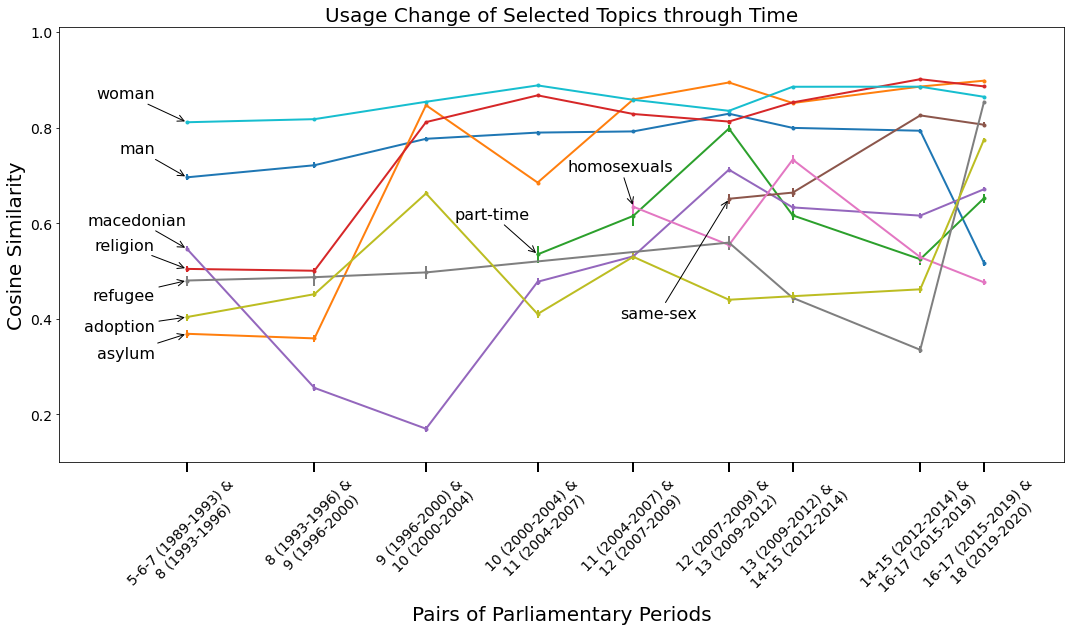

In [21]:
fig = plt.figure(figsize=(18, 8))


xytext_offsets = {
    'asylum': (-1, -0.05),
    'macedonian': (0, 0.05),
    'part-time': (-0.25, 0.075), 
    'woman': (-1, 0.05),
    'homosexuals': (1.25, 0.075),
    'refugee': (-1, -0.04),
    'religion': (-1, 0.04),
    'man': (-1, 0.05),
    'same-sex': (-1, -0.25),
    'adoption': (-1, -0.03)
}

for ti, topic in enumerate(topics_to_show):
    selected_topic_df = selected_topics_df[selected_topics_df['word'] == topic]
    #print(selected_topic_df)
    yerr = [
        selected_topic_df['yerr_low'],
        selected_topic_df['yerr_high']
    ]
    
    average_similarity = selected_topic_df['semantic_similarity_mean']
    x = selected_topic_df['period_middle'].iloc[0]
    y = average_similarity.iloc[0]
    plt.errorbar(x=selected_topic_df['period_middle'], 
                 y=average_similarity, 
                 yerr=yerr, 
                 label=topic, 
                 linewidth=2, markersize=3, fmt='-o')
    plt.annotate(topics[topic], 
                 xy=(x, y), 
                 xytext=(x+xytext_offsets[topics[topic]][0], y+xytext_offsets[topics[topic]][1]),
                 fontsize=16,
                 ha='right',
                 arrowprops=dict(arrowstyle='->'))

plt.xlim((1988.5, 2020))
plt.ylim((0.1, 1.01))

xticks = selected_topic_df['period_middle'].unique()
xtick_labels = [ period_ticklabel(x) for x in sorted(selected_topic_df['period_pair'].unique()) ]
plt.xticks(xticks, xtick_labels, rotation=45, fontsize=14)
plt.tick_params(axis='x', direction='out', which='major', length=10, width=2)
plt.yticks(fontsize=14)


plt.ylabel('Cosine Similarity', fontsize=20)
plt.xlabel('Pairs of Parliamentary Periods', fontsize=20)
_ = plt.title('Usage Change of Selected Topics through Time', fontsize=20)
plt.savefig('../out_files/usage_change_of_selected_topics_through_time_with_errorbars.png', dpi=300,  
            bbox_inches='tight')